# Extract data from yahoo finance

In [87]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
!pip install yfinance

In [89]:
import yfinance as yf

In [90]:
msyf= yf.Ticker("MSFT")

In [91]:
print(msyf.history(period="max"))

                  Open        High         Low       Close      Volume  \
Date                                                                     
1986-03-13    0.055654    0.063838    0.055654    0.061109  1031788800   
1986-03-14    0.061109    0.064384    0.061109    0.063292   308160000   
1986-03-17    0.063292    0.064929    0.063292    0.064383   133171200   
1986-03-18    0.064384    0.064929    0.062201    0.062746    67766400   
1986-03-19    0.062746    0.063292    0.061109    0.061655    47894400   
...                ...         ...         ...         ...         ...   
2022-05-16  259.355934  265.202334  255.185655  260.892365    32550900   
2022-05-17  265.491640  267.706483  261.850127  266.200012    28828800   
2022-05-18  263.000000  263.600006  252.770004  254.080002    31356000   
2022-05-19  253.899994  257.670013  251.880005  253.139999    32692300   
2022-05-20  257.239990  258.540009  246.440002  252.559998    39169300   

            Dividends  Stock Splits  

In [92]:
df = yf.download("MSFT", start="2015-01-01", end="2022-05-20",group_by="ticker") 

[*********************100%***********************]  1 of 1 completed


In [93]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,40.741405,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.013313,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.636169,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.039726,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.548466,29114100
...,...,...,...,...,...,...
2022-05-13,257.350006,263.040009,255.350006,261.119995,260.513245,34893400
2022-05-16,259.959991,265.820007,255.779999,261.500000,260.892365,32550900
2022-05-17,266.109985,268.329987,262.459991,266.820007,266.200012,28828800


In [94]:
msyf=df[['Open','Volume']]
msyf

,Open,Volume
Date,,
2014-12-31,46.730000,21552500
2015-01-02,46.660000,27913900
2015-01-05,46.369999,39673900
2015-01-06,46.380001,36447900
2015-01-07,45.980000,29114100
...,...,...
2022-05-13,257.350006,34893400
2022-05-16,259.959991,32550900
2022-05-17,266.109985,28828800


In [95]:
msyf.drop('Open', axis=1, inplace=True)

In [96]:
msyf

,Volume
Date,
2014-12-31,21552500
2015-01-02,27913900
2015-01-05,39673900
2015-01-06,36447900
2015-01-07,29114100
...,...
2022-05-13,34893400
2022-05-16,32550900
2022-05-17,28828800


Step 2. Resample the data, 
Aggregation of data,
Daily finance to monthly finances,

In [134]:
ts=msyf['Volume'].resample('MS').sum()
ts.head()

Date
2014-12-01     21552500
2015-01-01    918966800
2015-02-01    656509700
2015-03-01    824335300
2015-04-01    874535300
Freq: MS, Name: Volume, dtype: int64

<AxesSubplot:xlabel='Date'>

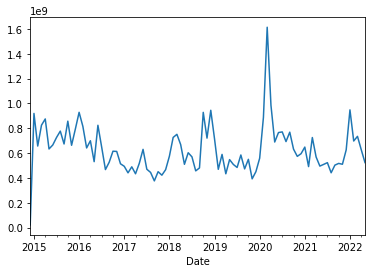

In [135]:
ts.plot()

Step 3. Stationarity check, 
this means that we decompose the observed series into ,
trend, seasonal and residual

In [136]:
import statsmodels.api as sm

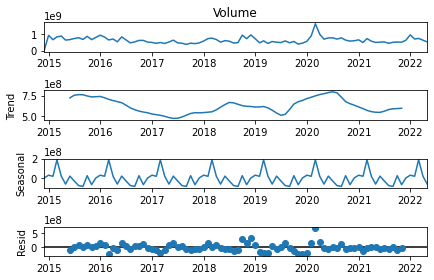

In [137]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig=decomposition.plot()
plt.show()

In [138]:
from statsmodels.tsa.stattools import adfuller

In [139]:
adftest=adfuller(ts)

In [140]:
print('pvalue of adfuller test is:', adftest[1])

pvalue of adfuller test is: 1.474193053446204e-08


This means that the time series is stationary since the pvalue is less than 0.5

Step 4: train test split

In [141]:
len(ts)

90

In [142]:
train=ts[:68]
test=ts[68:]

# ARIMA Model building
  ARIMA has three componests
  1. AR - Autoregression
  2. MA - Moving Average
  3. I - Integrated (differencing)
  P - Order of AR, P is gotten from PACF plot.
  PACF is a plot that shows the correlation of a series with it lagged values.
  
  MA-It says that the output has more effect on the previous error term
  
  q - the order of MA, just the correlation between the past errors
      from ACF plots.
      
  I - means integrated.
  We difference the data to remove the trend and seasonality.
  
  d - is the order, i.e how many time s we difference the data
      

Step 5: Hyperparaters of the ARIMA model p d q

In [143]:
# Assume
# p=2, d=0, q=2

In [144]:
# How to get p d q  we get 3 differents  method.

Step 6: Build ARIMA model

In [145]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
from statsmodels.tsa.arima_model import ARIMA

In [147]:
model=ARIMA(train, order=(2,0,2)).fit()

Step 7: Predict the dataset

In [148]:
len(train),len(ts)-1

(68, 89)

In [149]:
prediction = model.predict(start=len(train), end=len(ts)-1)

In [150]:
prediction.head()

2020-08-01    6.998256e+08
2020-09-01    6.713042e+08
2020-10-01    6.427838e+08
2020-11-01    6.307082e+08
2020-12-01    6.287148e+08
Freq: MS, dtype: float64

Step 8: Model evaluation

In [151]:
from sklearn.metrics import mean_squared_error

In [152]:
error = np.sqrt(mean_squared_error(test, prediction))
error

116604826.08610289

In [153]:
test.mean(), np.sqrt(test.var())

(606592909.0909091, 119322483.86760224)

<AxesSubplot:xlabel='Date'>

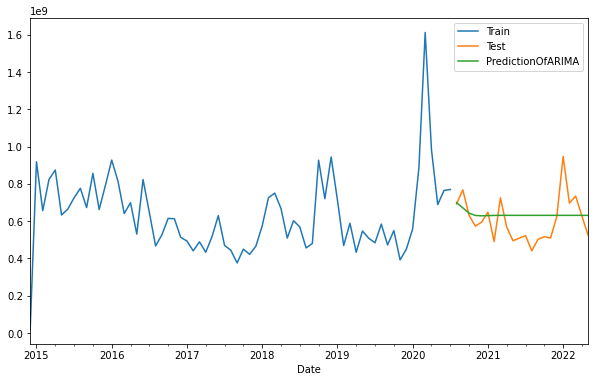

In [154]:
train.plot(legend=True, label='Train',figsize=(10,6))
test.plot(legend=True, label='Test')
prediction.plot(legend=True, label='PredictionOfARIMA')

Step 9: Predict the future

In [156]:
final_model=ARIMA(ts, order=(2,0,2)).fit()

In [157]:
prediction_final=final_model.predict(len(ts), len(ts)+7)

<AxesSubplot:xlabel='Date'>

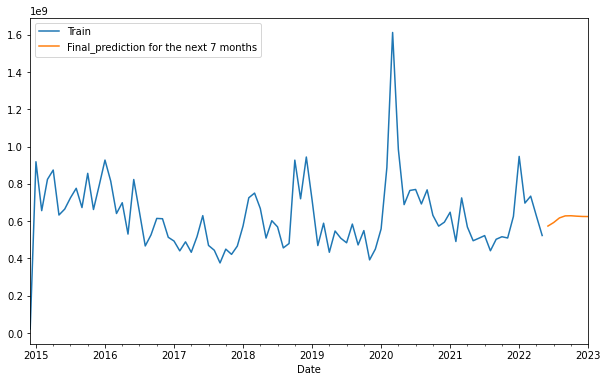

In [169]:
ts.plot(legend=True, label='Train', figsize=(10,6))
prediction_final.plot(legend=True,label='Final_prediction for the next 7 months')

Details on step 5:

to get our parameters for pdq, there are three methods to do this 

1. ACF PACF plot
2. Auto Arima function
3. For loop.

the method i used in my modelling is the for loop method.



In [159]:
import itertools

In [160]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [161]:
pdq_combination=list(itertools.product(p,d,q))

In [162]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [163]:
len(pdq_combination)

128

In [164]:
rmse=[]
order1=[]

In [165]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train, order=pdq).fit()
        prediction=model.predict(start=len(train),end=len(ts)-1)
        error=np.sqrt(mean_squared_error(test,prediction))
        order1.append(pdq)
        rmse.append(error)
        
        
    except:
        continue

In [166]:
results=pd.DataFrame(index=order1,data=rmse, columns=['RMSE'])

In [167]:
results.to_csv('ARIMA_result.csv')

In [168]:
results

,RMSE
"(0, 0, 1)",1.185223e+08
"(0, 0, 2)",1.174882e+08
"(0, 0, 3)",1.162328e+08
"(0, 0, 4)",1.170604e+08
"(0, 0, 5)",1.252638e+08
...,...
"(7, 1, 0)",6.009293e+08
"(7, 1, 1)",6.014498e+08
"(7, 1, 3)",6.197686e+08
"(7, 1, 5)",6.049162e+08
